In [4]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline
from tensorflow import keras
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers

# Data processing

In [5]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_gen=train_datagen.flow_from_directory('D:\HCMUS\GenderClassificationModel\gender200mb\Training',
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

Found 47009 images belonging to 2 classes.


In [4]:
valid_gen=test_datagen.flow_from_directory('D:\HCMUS\GenderClassificationModel\gender200mb\Validation',
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

Found 11649 images belonging to 2 classes.


# Build model

In [6]:
kernel_s=(3,3) # The size of kernel

In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [11]:
model=keras.models.load_model('D:\HCMUS\GenderClassificationModel\my_model.h5')

# Train model

In [8]:
history=model.fit(train_gen,steps_per_epoch=20,epochs=20,
                  validation_data=valid_gen,validation_steps=50)

Epoch 1/20
20/20 [==============================] - 97s 5s/step - loss: 0.7371 - acc: 0.5135 - val_loss: 0.7049 - val_acc: 0.4863
Epoch 2/20
20/20 [==============================] - 93s 5s/step - loss: 0.7039 - acc: 0.5260 - val_loss: 0.6944 - val_acc: 0.5379
Epoch 3/20
20/20 [==============================] - 87s 4s/step - loss: 0.6912 - acc: 0.5375 - val_loss: 1.3159 - val_acc: 0.5217
Epoch 4/20
20/20 [==============================] - 89s 5s/step - loss: 0.7169 - acc: 0.5656 - val_loss: 0.6636 - val_acc: 0.5742
Epoch 5/20
20/20 [==============================] - 85s 4s/step - loss: 0.6329 - acc: 0.6500 - val_loss: 0.6173 - val_acc: 0.6871
Epoch 6/20
20/20 [==============================] - 89s 4s/step - loss: 0.6215 - acc: 0.6719 - val_loss: 0.5472 - val_acc: 0.7454
Epoch 7/20
20/20 [==============================] - 86s 4s/step - loss: 0.6235 - acc: 0.7104 - val_loss: 0.5088 - val_acc: 0.7646
Epoch 8/20
20/20 [==============================] - 115s 6s/step - loss: 0.5599 - acc: 0.7

# Plot loss and accuracy

<Figure size 432x288 with 0 Axes>

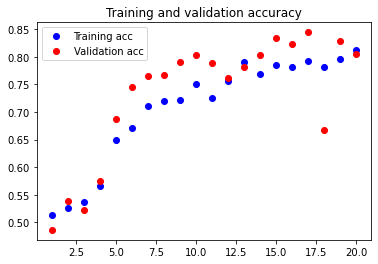

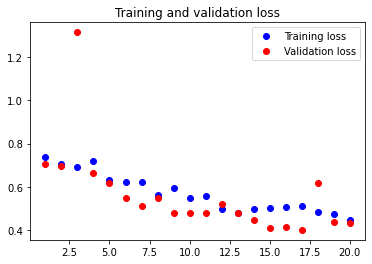

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

Test 1

In [10]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen1.flow_from_directory(
'D:\HCMUS\GenderClassificationModel\gender2\Dataset\Test',
target_size=(250,250),
batch_size=32,
class_mode='binary')

Found 20001 images belonging to 2 classes.


In [13]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen1.flow_from_directory(
'D:\HCMUS\GenderClassificationModel\gender200mb\Validation',
target_size=(250,250),
batch_size=32,
class_mode='binary')

Found 11649 images belonging to 2 classes.


In [15]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
print('test acc:', test_acc)
print('test_loss:',test_loss)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14908\2982191485.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)


test acc: 0.8203125
test_loss: 0.3896351456642151


test 2

In [12]:
# new data from outside kaggle website to test on it.
male_path = 'D:/HCMUS/GenderClassificationModel/test2/male/'
female_path = 'D:/HCMUS/GenderClassificationModel/test2/female/'

In [13]:
# funtion that display image, its gender and precentage of gender.
def show_image(im, row, col, result):
    if int(result*2) >= 1:
        precentage = (round(float(((result[0]-0.5 ) +0.5 )* 100 ),2))
        title = f"Male:{precentage}%"
    else:
        precentage = (round(float(((0.5-result[0])+0.5)* 100 ),2))
        title = f"Female:{precentage}%"
    
    ax[row][col].imshow(im)
    ax[row][col].set_title(title)
    ax[row][col].axis("off")

In [14]:
from skimage.transform import resize

1/1 [==============================] - 0s 29ms/step


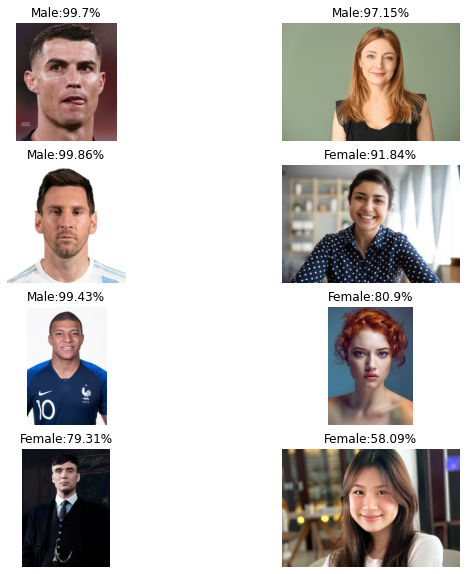

In [15]:
# create subplot for outside image.
fig, ax = plt.subplots(4,2,figsize=(10,10))

# loop on new image predict and display.
for row in range(4):
    im_0 = plt.imread(male_path + str(row+1) + '.jpg')
    im_1 = plt.imread(female_path + str(row+1) + '.jpg')
    
    im_0_resize = resize(im_0, (250, 250))
    im_1_resize = resize(im_1, (250, 250))
    
    im_0_resize = np.expand_dims(im_0_resize, axis =0)
    im_1_resize = np.expand_dims(im_1_resize, axis =0)
    
    result_0 = model.predict(im_0_resize)
    result_1 = model.predict(im_1_resize)
    
    show_image(im_0, row, 0, result_0)
    show_image(im_1, row, 1, result_1)
    
plt.show()